In [2]:
from scipy.stats import ttest_ind, pearsonr, spearmanr, mannwhitneyu
import warnings
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random as rm
import scipy.stats as st
import seaborn as sns

In [3]:
data = pd.read_csv("data_2_ml.csv", sep=" ")
data.sample(3)

,overall,interesting,clarity,materials,tasks,user_id,lesson_name,stream_name,module_name,course,share45,var
1777,4.0,4.0,5.0,4.0,5.0,4813410,Урок 1. Настройка на новый ритм,Профессия Аналитик данных 29.0,Soft Track,Профессия Аналитик данных 4.0,1.00,0.333333
2695,4.0,4.0,5.0,4.0,4.0,17345293,У меня получилось: видео-истории выпускников,Профессия Аналитик данных 30.0,Погружение в профессию,Профессия Аналитик данных 4.0,1.00,0.250000
1731,3.0,4.0,2.0,4.0,4.0,16021448,Введение в Document Object Model,Профессия Веб-разработчик 7.0,3. JavaScript в браузере,Профессия Веб-разработчик,0.75,1.000000


In [4]:
ratings = ['overall', 'interesting', 'clarity', 'materials', 'tasks']

In [5]:
is_nan_count = data[ratings[1:5]].isna().sum(axis=1).reset_index().drop(
    'index', axis=1)
is_nan_count.columns = ['is_nan']
is_nan_count.groupby(['is_nan'])['is_nan'].count()

is_nan
0    3075
1     269
2      84
3      18
4      10
Name: is_nan, dtype: int64

In [6]:
data_2_ml = data.dropna()
data_2_ml.sample(3)

,overall,interesting,clarity,materials,tasks,user_id,lesson_name,stream_name,module_name,course,share45,var
43,5.0,5.0,5.0,2.0,2.0,17104532,Урок 3. Агрегация данных,Профессия Аналитик данных 29.0,Основы работы в Excel,Профессия Аналитик данных 4.0,0.50,3.00
2659,4.0,4.0,5.0,5.0,5.0,14310299,Урок без имени,Поток без имени,Модуль без имени,Финансовая грамотность,1.00,0.25
196,5.0,3.0,5.0,5.0,5.0,6080701,Урок без имени,Поток без имени,Модуль без имени,Финансовая грамотность,0.75,1.00


In [7]:
data_bolean = data_2_ml[[
    'overall', 'interesting', 'clarity', 'materials', 'tasks', 'share45', 'var'
]].copy()
mask = {5: 1, 4: 1, 3: 0, 2: 0, 1: 0}
for each in [
        0,
        1,
        2,
        3,
        4,
]:
    data_bolean[ratings[each]] = data_bolean[ratings[each]].map(mask)
data_bolean.sample(3)

,overall,interesting,clarity,materials,tasks,share45,var
3299,1,1,1,1,1,1.00,0.000000
1828,1,0,1,1,1,0.75,0.916667
57,0,0,1,0,0,0.25,0.250000


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [9]:
X = data_bolean.drop(['overall'], axis=1)
y = data_bolean['overall']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
sensitivities = pd.DataFrame(columns=['test_size', 'acc'])

warnings.filterwarnings('ignore')  # отключаем "розовые бумажки"

for each in range(1, 100, 1):

    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y,
                                                        test_size=each / 100,
                                                        random_state=4)

    tree = DecisionTreeClassifier()
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    sensitivities = sensitivities.append(
        {'test_size': each, 'acc': acc}, ignore_index=True)

warnings.filterwarnings('default')  # включаем "розовые бумажки"

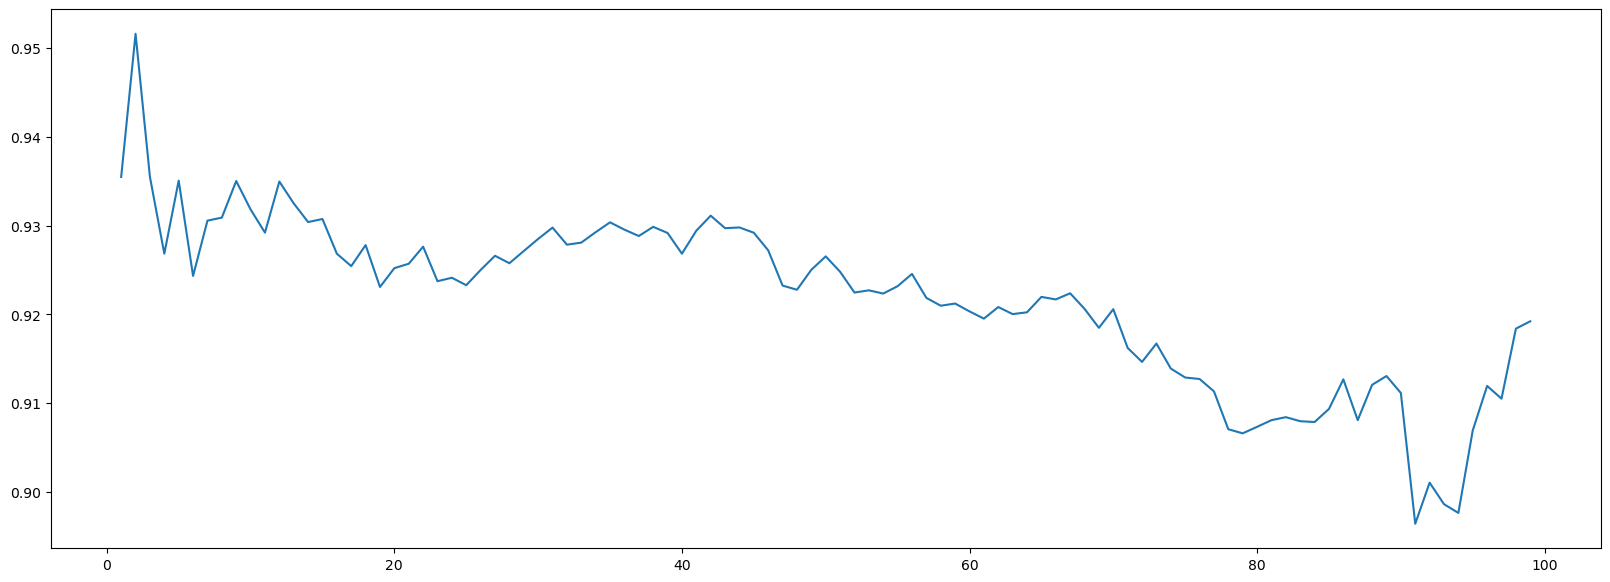

In [12]:
plt.figure(figsize=(20, 7))
plt.plot(sensitivities['test_size'], sensitivities['acc'])
plt.show()

In [13]:
acc = accuracy_score(y_test, y_pred)
f'{acc*100:.1f}%'

'91.9%'

In [14]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 309,  165],
       [  81, 2490]], dtype=int64)

<AxesSubplot:>

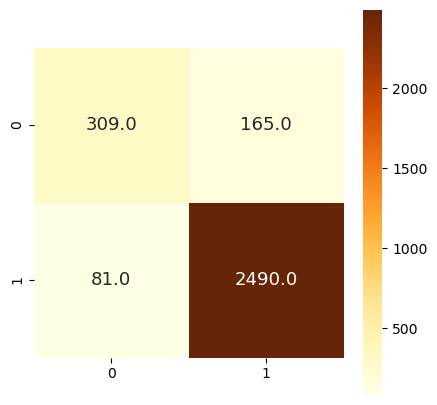

In [15]:
plt.figure(figsize=(5, 5))
sns.heatmap(cm,
            cbar=True,
            square=True,
            fmt='.1f',
            annot=True,
            annot_kws={'size': 13},
            cmap='YlOrBr')

<AxesSubplot:>

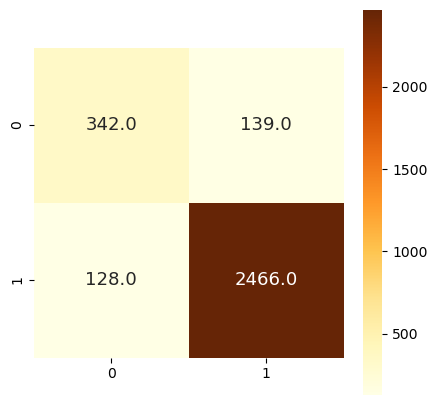

In [16]:
cm_1 = confusion_matrix(data_bolean['overall'], data_bolean['interesting'])

plt.figure(figsize=(5, 5))
sns.heatmap(cm_1,
            cbar=True,
            square=True,
            fmt='.1f',
            annot=True,
            annot_kws={'size': 13},
            cmap='YlOrBr')

In [17]:
cm_1

array([[ 342,  139],
       [ 128, 2466]], dtype=int64)

<AxesSubplot:>

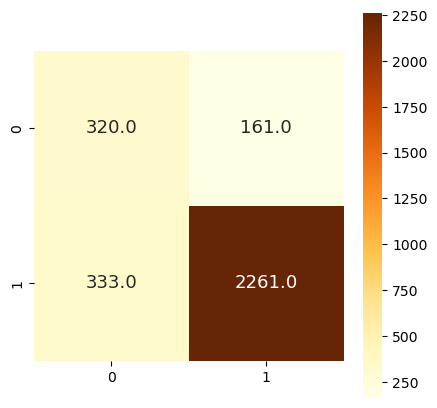

In [18]:
cm_2 = confusion_matrix(data_bolean['overall'], data_bolean['clarity'])

plt.figure(figsize=(5, 5))
sns.heatmap(cm_2,
            cbar=True,
            square=True,
            fmt='.1f',
            annot=True,
            annot_kws={'size': 13},
            cmap='YlOrBr')

<AxesSubplot:>

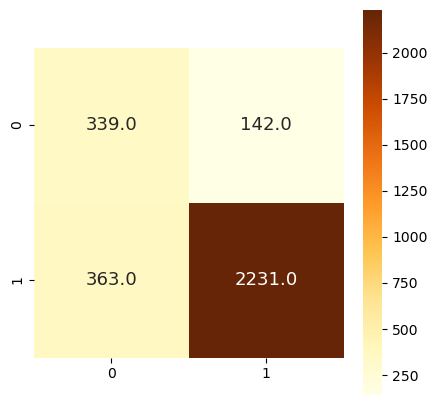

In [19]:
cm_3 = confusion_matrix(data_bolean['overall'], data_bolean['materials'])

plt.figure(figsize=(5, 5))
sns.heatmap(cm_3,
            cbar=True,
            square=True,
            fmt='.1f',
            annot=True,
            annot_kws={'size': 13},
            cmap='YlOrBr')

<AxesSubplot:>

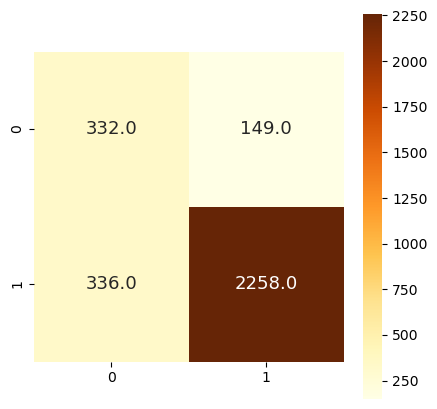

In [20]:
cm_4 = confusion_matrix(data_bolean['overall'], data_bolean['tasks'])

plt.figure(figsize=(5, 5))
sns.heatmap(cm_4,
            cbar=True,
            square=True,
            fmt='.1f',
            annot=True,
            annot_kws={'size': 13},
            cmap='YlOrBr')

In [21]:
con_mat = [cm, cm_1, cm_2, cm_3, cm_4]
i = 0
print('Доля ошибок любого рода: \n')
for each in con_mat:
    print(ratings[i])
    i += 1
    print(
        f'{100 * (each[0][1] + each[1][0]) / (each[0][0] + each[1][1]):7.2f}%\n')

Доля ошибок любого рода: 

overall
   8.79%

interesting
   9.51%

clarity
  19.14%

materials
  19.65%

tasks
  18.73%



In [22]:
data.head(3)

,overall,interesting,clarity,materials,tasks,user_id,lesson_name,stream_name,module_name,course,share45,var
0,4.0,4.0,4.0,4.0,4.0,16024429,Инструменты тестирования,Профессия инженер по тестированию 29.0 Професс...,Тестирование API,Профессия QA,1.00,0.000000
1,3.0,4.0,3.0,3.0,4.0,17679376,Урок без имени,Поток без имени,Модуль без имени,Excel для анализа данных,0.50,0.333333
2,4.0,4.0,5.0,3.0,4.0,11265148,Урок без имени,Поток без имени,Модуль без имени,Профессия Маркетинг на международных рынках,0.75,0.666667


## 5-level confusion martix 5x5

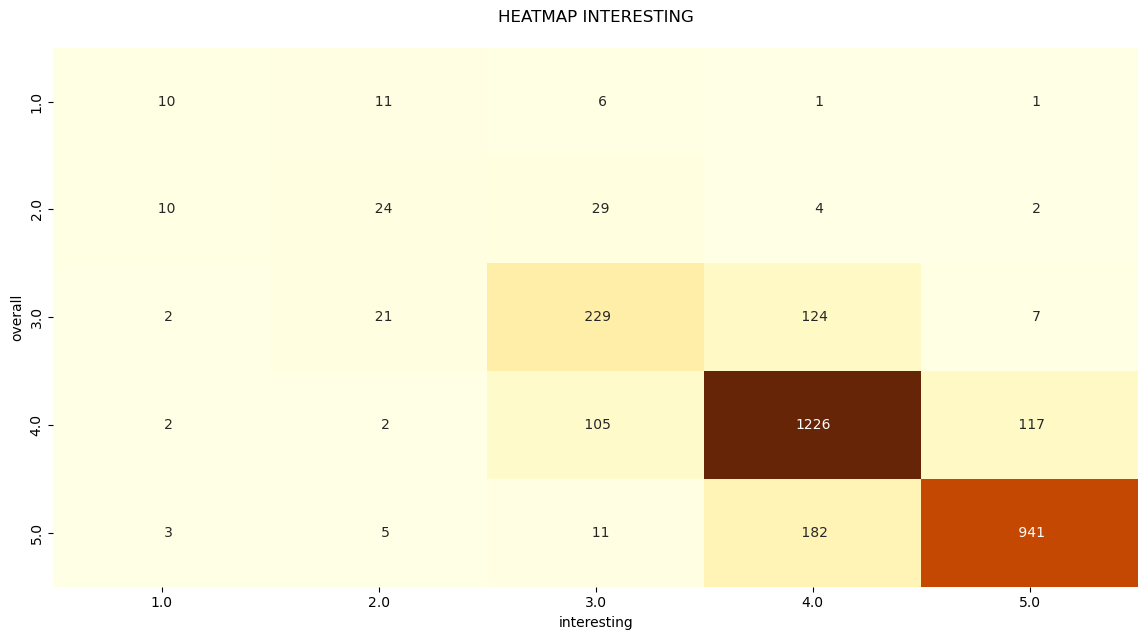

In [23]:
interesting_agg = data.dropna().groupby(['overall', 'interesting'])[
    'user_id'].count().reset_index()

interesting_heatmap = interesting_agg.pivot(index="overall",
                                            columns="interesting",
                                            values="user_id")

plt.figure(figsize=(14, 7))
sns.heatmap(interesting_heatmap,
            annot=True,
            cmap='YlOrBr',
            fmt='4g',
            cbar=False)
plt.title(f"HEATMAP INTERESTING\n")
plt.ylabel("overall")
plt.xlabel("interesting")
plt.show()

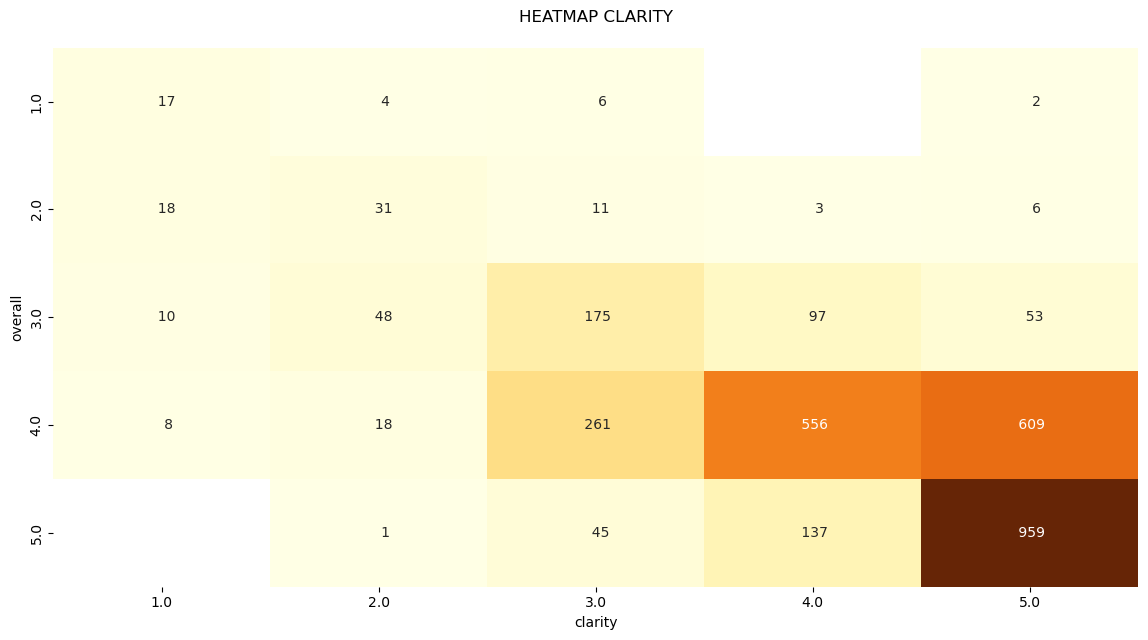

In [24]:
clarity_agg = data.dropna().groupby(['overall', 'clarity'])[
    'user_id'].count().reset_index()

clarity_heatmap = clarity_agg.pivot(index="overall",
                                    columns="clarity",
                                    values="user_id")

plt.figure(figsize=(14, 7))
sns.heatmap(clarity_heatmap,
            annot=True,
            cmap='YlOrBr',
            fmt='4g',
            cbar=False)
plt.title(f"HEATMAP CLARITY\n")
plt.ylabel("overall")
plt.xlabel("clarity")
plt.show()

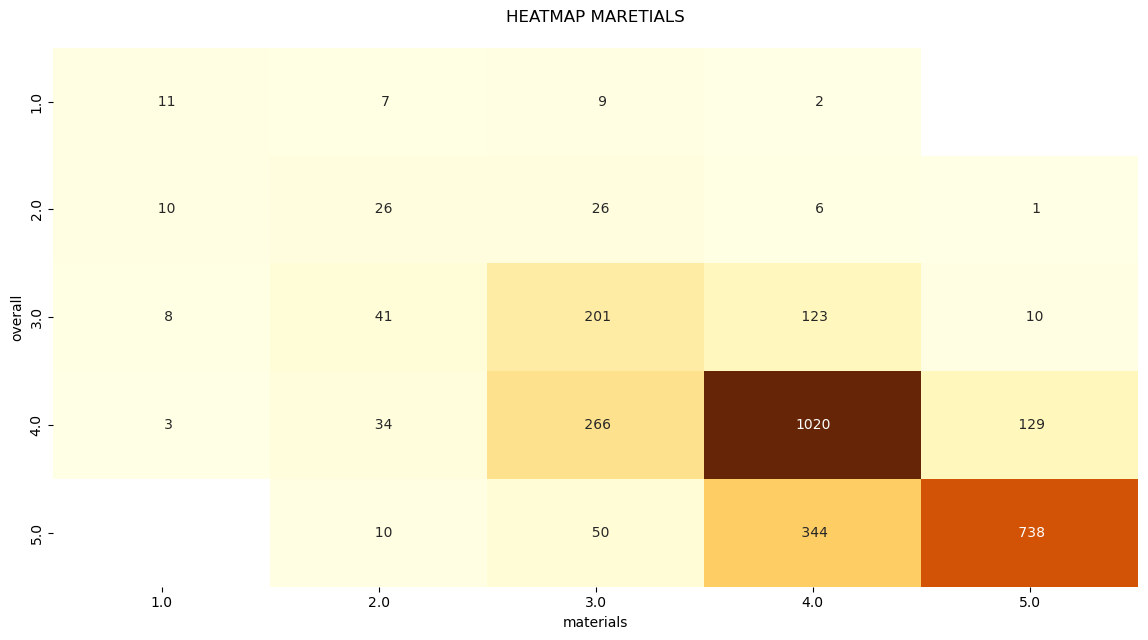

In [25]:
materials_agg = data.dropna().groupby(['overall', 'materials'])[
    'user_id'].count().reset_index()

materials_heatmap = materials_agg.pivot(index="overall",
                                        columns="materials",
                                        values="user_id")

plt.figure(figsize=(14, 7))
sns.heatmap(materials_heatmap,
            annot=True,
            cmap='YlOrBr',
            fmt='4g',
            cbar=False)
plt.title(f"HEATMAP MARETIALS\n")
plt.ylabel("overall")
plt.xlabel("materials")
plt.show()

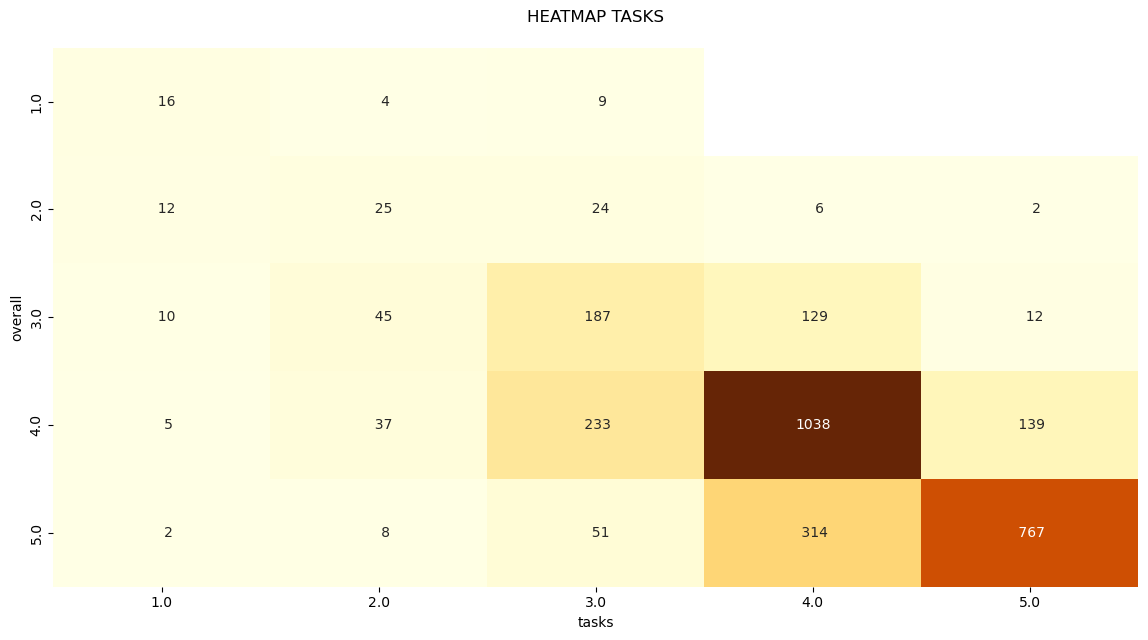

In [26]:
tasks_agg = data.dropna().groupby(['overall', 'tasks'])[
    'user_id'].count().reset_index()

tasks_heatmap = tasks_agg.pivot(index="overall",
                                columns="tasks",
                                values="user_id")

plt.figure(figsize=(14, 7))
sns.heatmap(tasks_heatmap,
            annot=True,
            cmap='YlOrBr',
            fmt='4g',
            cbar=False)
plt.title(f"HEATMAP TASKS\n")
plt.ylabel("overall")
plt.xlabel("tasks")
plt.show()